# Machine Learning: Homework 2
## Jose Vazquez-Espinoza

codigo y libreria en: https://github.com/joseluisvaz/machine_learning_itesm

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

#Import own library
import ML_Algorithms.LinearMethods as lm
import ML_Algorithms.GradientDescent as gd

#Import Already generated classes

linear2class = pd.read_csv("dataSamples/twoclasslinear.csv")
notlinear2class = pd.read_csv("dataSamples/twoclassnotlinear.csv")
linear3class = pd.read_csv("dataSamples/threeclasslinear.csv")
notlinear3class = pd.read_csv("dataSamples/threeclassnotlinear.csv")

Here, we are going to plot our linearly separable classes and use linear classification

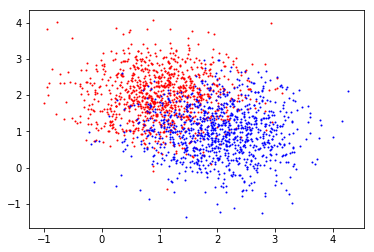

In [2]:
plt.scatter(linear2class[linear2class["y"] == 1]["x1"], linear2class[linear2class["y"] == 1]["x2"], color = 'r', s=1)
plt.scatter(linear2class[linear2class["y"] == -1]["x1"], linear2class[linear2class["y"] == -1]["x2"], color = 'b', s=1)
plt.show()


Aqui vamos a crear un clasificador usando el metodo de gradient descent, se puede observar como los coeficientes convergen conforme aumentann las iteraciones

In [10]:
#Creating a classifier 

Xdata2linear = linear2class[["x1", "x2"]].as_matrix()
Ydata2linear = linear2class[["y"]].as_matrix()

clf = gd.GradientClassifier()
clf.fit(Xdata2linear, Ydata2linear, step="fixed", reg=0, 
        print_iter=True, step_size= 0.01, max_iter=1000)
clf.coef

coef:[ 0.         -0.00705715  0.00708496]
coef:[ 0.00507026 -0.48829077  0.50742387]
coef:[ 0.00506196 -0.48828828  0.50742643]
coef:[ 0.0050616  -0.48828817  0.50742654]
coef:[ 0.00506158 -0.48828816  0.50742655]
coef:[ 0.00506158 -0.48828816  0.50742655]
coef:[ 0.00506158 -0.48828816  0.50742655]
coef:[ 0.00506158 -0.48828816  0.50742655]
coef:[ 0.00506158 -0.48828816  0.50742655]
coef:[ 0.00506158 -0.48828816  0.50742655]


array([ 0.00111093, -0.49491119,  0.5010604 ])

Se implemento la busqueda del step size optimo pero no logro converger tan rapido

In [12]:
clf = gd.GradientClassifier()
clf.fit(Xdata2linear, Ydata2linear, step="golden", reg=0, print_iter=True, max_iter=3000)
clf.coef

coef:[ 0.         -0.00025869  0.00025971]
coef:[  2.86724602e-05  -2.60806715e-02   2.62779751e-02]
coef:[ 0.0001067  -0.05182097  0.05237696]


coef:[ 0.00022425 -0.0774956   0.07854041]
coef:[ 0.00037305 -0.10311817  0.10475468]
coef:[ 0.00054616 -0.12870011  0.13100846]


coef:[ 0.00073787 -0.15425089  0.15729245]
coef:[ 0.00094353 -0.17977822  0.1835991 ]
coef:[ 0.0011594  -0.20528832  0.20992238]


coef:[ 0.00138254 -0.23078607  0.23625756]
coef:[ 0.00161067 -0.25627525  0.262601  ]
coef:[ 0.00184208 -0.28175867  0.28894998]


coef:[ 0.0020755  -0.30723841  0.3153025 ]
coef:[ 0.00231002 -0.3327159   0.34165719]
coef:[ 0.00254499 -0.35819207  0.36801314]
coef:[ 0.00277995 -0.38366751  0.39436981]


coef:[ 0.00301446 -0.4091425   0.42072691]
coef:[ 0.00324802 -0.43461708  0.44708442]
coef:[ 0.00347938 -0.46009096  0.47344262]
coef:[ 0.00370048 -0.48556171  0.49980394]


coef:[ 0.00359877 -0.49074064  0.50506919]
coef:[ 0.00359869 -0.49074062  0.50506921]
coef:[ 0.00359869 -0.49074062  0.50506921]
coef:[ 0.00359869 -0.49074062  0.50506921]


coef:[ 0.00359869 -0.49074062  0.50506921]
coef:[ 0.00359869 -0.49074062  0.50506921]
coef:[ 0.00359869 -0.49074062  0.50506921]


coef:[ 0.00359869 -0.49074062  0.50506921]
coef:[ 0.00359869 -0.49074062  0.50506921]
coef:[ 0.00359869 -0.49074062  0.50506921]


array([ 0.0037435 , -0.49049784,  0.50530258])

Aqui se puede ver que los valores de theta son los mismos que los de la solucion canonica

In [14]:
clf2classes = lm.LinearClassifier()
clf2classes.fit(Xdata2linear, Ydata2linear, reg = 0.3)

clf2classes.coef

array([[ 0.00364501],
       [-0.49058924],
       [ 0.50506884]])

Wrapping the method and  trying regularization values from 0 to 100 in unit increments

In [15]:
coefs = []
for i in range(0,100):
    clf.fit(Xdata2linear, Ydata2linear, step="fixed", reg=i,
            step_size= 0.01, max_iter=1000)
    coefs.append(clf.coef)

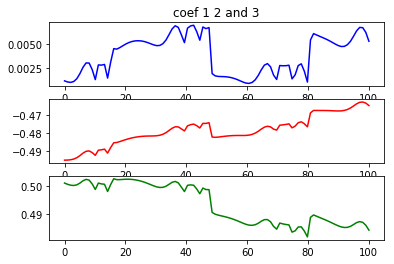

In [29]:
coefs = np.array(coefs)
l = np.linspace(0, 100,100)

plt.subplot(3, 1, 1)
plt.plot(l, coefs[:,0], 'b')
plt.title('coef 1 2 and 3')

plt.subplot(3, 1, 2)
plt.plot(l, coefs[:,1], 'r')
plt.subplot(3, 1, 3)
plt.plot(l, coefs[:,2], 'g')


plt.show()